![](Final_a.png)

\section*{a)}

In [38]:
import numpy as np 
import matplotlib.pyplot as plt
omega0=3
gamma=.5
def f(r,t):

    x=r[0]
    dxdt=r[1]
    d2xdt2=-x*omega0**2 - gamma*dxdt
    return np.array([dxdt,d2xdt2],float)
    
def rk4_2d(f,a,b,N,Init_cond=[0,0]):
    h = (b-a)/N
    tpoints = np.arange(a,b,h)
    xpoints = []
    vpoints = []
    r = np.array(Init_cond,float)
    for t in tpoints:

        xpoints.append(r[0])
        vpoints.append(r[1])

        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    return tpoints,xpoints,vpoints

In [39]:
a,b,N=0,20,10000
h = (b-a)/N
t,x,v=rk4_2d(f,a,b,N,Init_cond=[1,0])

La solución para este tipo de ecuación diferencial tiene la forma siguiente
$$ x= A_0 e^{-\gamma t/2 }\cos{\omega t}$$
Verificamos si esto concuerda con nuestra solución numérica más abajo

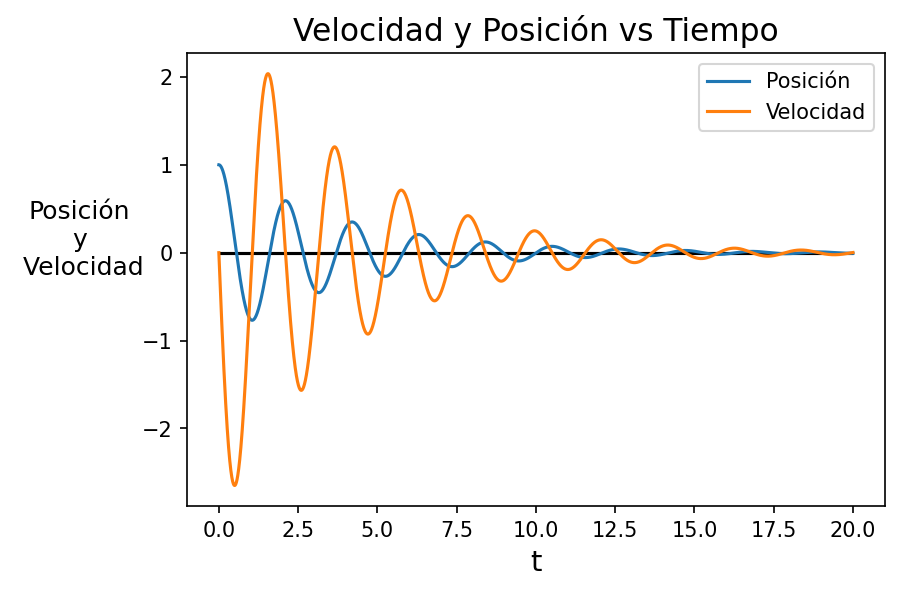

In [40]:
plt.figure(dpi=150)
plt.plot(t,x,label='Posición')
plt.plot(t,v,label='Velocidad')
plt.hlines(0,min(t),max(t),'k')
plt.ylabel('Posición\ny\n Velocidad',rotation=0,labelpad=30,size=12)
plt.xlabel('t',size=14)
plt.legend()
plt.title("Velocidad y Posición vs Tiempo",size=15)
plt.show()

![](Final_b.png)

El perido se define como $$ T = \frac{2\pi}{\omega}$$ donde $\omega= \sqrt{\omega_0^2 - (\gamma/2)^2}$ y tenemos que $$T=\frac{2\pi}{\sqrt{\omega_0^2 - (\gamma/2)^2}}$$

In [41]:
omega0=3
gamma=.5
omega=(omega0**2-(gamma/2)**2)**(.5)
T= 2*np.pi/omega
print("El periodo es",T,"s")
print("La frecuencia angular del sistema amortiguado es",omega,"Hz")


T= 2*np.pi/(omega0**2)**(.5)

print("\nSin amortiguamiento\nT = {} s\n".format(T))
for gamma in [1,2,3]:
#     if gamma==omega0:
#         print('El perido con gamma={} es infinito ya que hay amortiguamiento crítico'.format(gamma))
#         continue
    T= 2*np.pi/(omega0**2-(gamma/2)**2)**(.5)
    print('El perido con gamma={} es {} s'.format(gamma,T))

El periodo es 2.101705404209151 s
La frecuencia angular del sistema amortiguado es 2.9895651857753496 Hz

Sin amortiguamiento
T = 2.0943951023931953 s

El perido con gamma=1 es 2.1241043182442114 s
El perido con gamma=2 es 2.221441469079183 s
El perido con gamma=3 es 2.4183991523122903 s


![](Final_b.png)

Vemos que sin amortiguamiento el período es más corto y que mientras más amortiguamiento haya el periodo aumenta.
Esto es porque la cantidad de oscilaciones por segundo se están disminuyendo hasta llegar a 0, lo que causa que $T =\dfrac{2\pi}{\omega}$ aumente.

Con esta información verificamos si nuestra solución numérica corresponde a la analítica

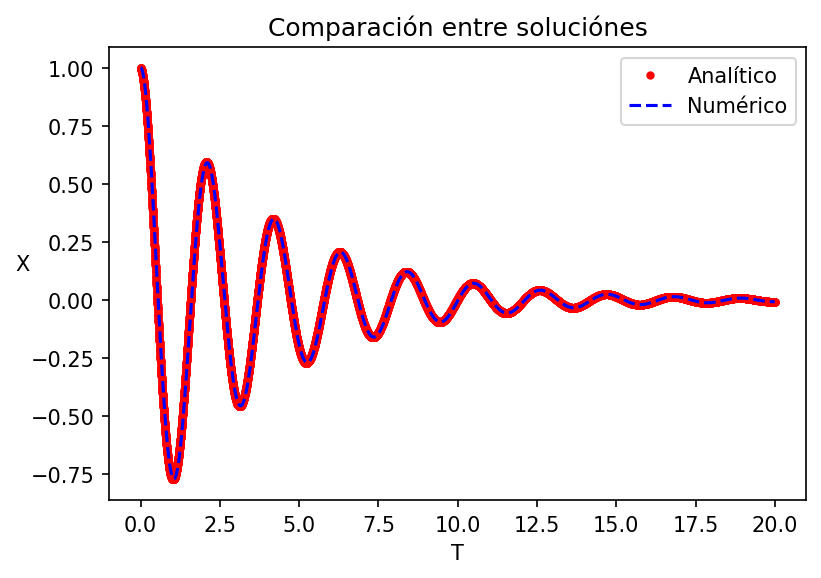

In [42]:
omega0=3
gamma=.5
omega=(omega0**2-(gamma/2)**2)**(.5)
T= 2*np.pi/omega

X=x[0]*np.exp(-gamma*t/2)*np.cos(omega*t)
plt.figure(dpi=150)
plt.plot(t,X,'r.')
plt.plot(t,x,'b--')
plt.title("Comparación entre soluciónes")
plt.ylabel("X",rotation=0)
plt.xlabel("T")
plt.legend(('Analítico',"Numérico"))
plt.show()


Por lo visto no hay diferencias entre las soluciones 

![](Final_c.png)

\section*{c) Computar el tiempo de relajamiento $\tau$}

El tiempo $\tau$ tendrá la amplitud a un valor de $A_0/e\approx A_0 \times 0.37$

Primero creamos una lista de las amplitudes en todo el movimiento

In [43]:
A0=x[0] #Amplitud inicial
T0p5= 2*np.pi/omega # Periodo con gamma = 1/2
T=T0p5
Tplot=[0] # Inicializar lista de tiempos donde t = n*Periodo
A=[A0] #inicializar lista de Amplitudes máximas en todo el movimiento

# hallar los tiempos donde t es un múltiplo del período
for i,j in zip(t,x):
    if abs(i-T)<= h/2:
        A.append(j)
        Tplot.append(i)
        T+=T0p5
        


print("T ={}\n".format(Tplot))

print("A is",A)

Atau=np.array(A)*.37 # lista de amplitudes reducidas por .37

print("\nA_tau is {}\n".format(Atau))


# Hallar los tiempos tau en todo el movimiento 
tau=0
count=0
Tauplot=[] # lista de tiempos donde se reduce la amplitud
Tau=[] # lista del valor tau por cada ciclo (debe ser constante 1/gamma)
delta=1
for i,j in zip(x,t):
    if count==len(Atau) :
        break
    if (abs(i - Atau[count]) <= h/5) and i>0 and Tplot[count]<j and abs(Tplot[count]-j)>=delta:
        print("A es {:.3E}".format(Atau[count]))
        print("i es {:.3E}".format(i))
        print("t es {}".format(j))
        delta=j-tau
        Tau.append(delta)
        tau=j
        Tauplot.append(j)
        
        print("tau",delta)
        print("--"*10)
        count+=1

T =[0, 2.102, 4.204, 6.306, 8.406, 10.508000000000001, 12.61, 14.712, 16.814, 18.916]

A is [1.0, 0.5913029769689905, 0.3496389375162739, 0.2067422217236394, 0.12224739712258584, 0.0722854073328698, 0.0427426362760982, 0.025273863648176517, 0.014944508351497757, 0.008836723920125886]

A_tau is [0.37       0.2187821  0.12936641 0.07649462 0.04523154 0.0267456
 0.01581478 0.00935133 0.00552947 0.00326959]

A es 3.700E-01
i es 3.700E-01
t es 2.408
tau 2.408
--------------------
A es 2.188E-01
i es 2.186E-01
t es 4.51
tau 2.102
--------------------
A es 1.294E-01
i es 1.291E-01
t es 6.612
tau 2.1020000000000003
--------------------
A es 7.649E-02
i es 7.680E-02
t es 8.712
tau 2.0999999999999996
--------------------
A es 4.523E-02
i es 4.536E-02
t es 10.814
tau 2.1020000000000003
--------------------
A es 2.675E-02
i es 2.698E-02
t es 12.914
tau 2.0999999999999996
--------------------
A es 1.581E-02
i es 1.616E-02
t es 15.012
tau 2.0980000000000008
--------------------
A es 9.351E-03
i es 9

In [74]:
#teórico
Aexp=A0*np.exp(-gamma*t/2)
count=0
tau=0
tau_teorico=[]
A_teor=[]
Tau_teo=[]
for Ax,j in zip(Aexp,t):
    if abs(Ax-Atau[count])<=h/20:
        print(Ax,"en tiempo",j)
        delta=j-tau
        tau_teorico.append(j)
        Tau_teo.append(delta)
        A_teor.append(Ax)
        count=count+1
        tau=j

0.37009335291196127 en tiempo 3.976
0.21882127023923378 en tiempo 6.078
0.12944489624757924 en tiempo 8.178
0.07657382276516132 en tiempo 10.278
0.04532031011776911 en tiempo 12.376
0.02683629544670454 en tiempo 14.472
0.015906936611779787 en tiempo 16.564
0.009447548397216066 en tiempo 18.648


In [75]:
print(Tau_teo)

[3.976, 2.1020000000000003, 2.1000000000000005, 2.0999999999999996, 2.097999999999999, 2.096, 2.0920000000000005, 2.0839999999999996]


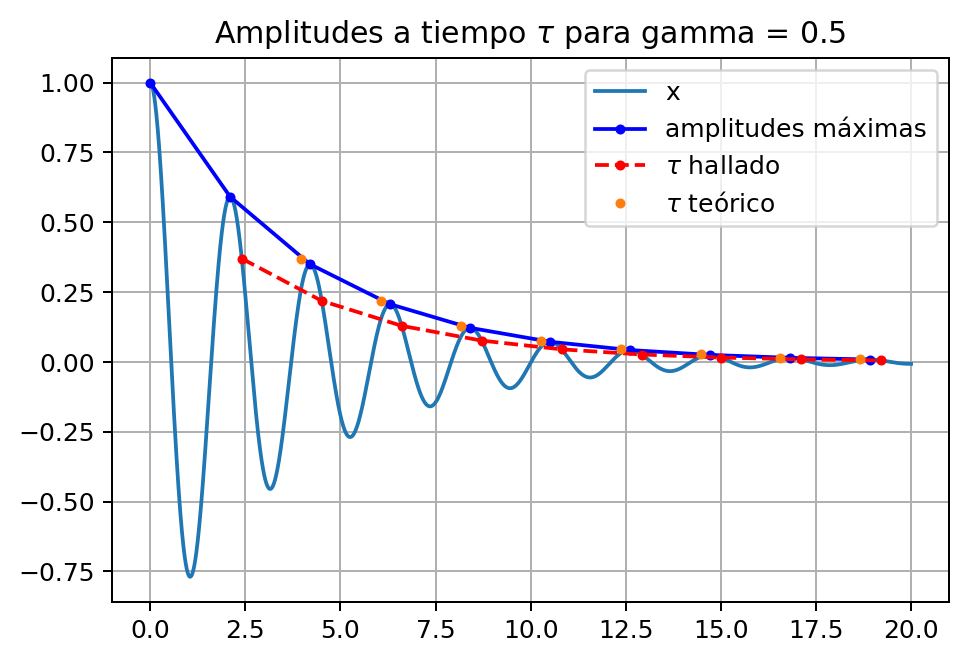

In [72]:
# tao=[2*i/(gamma) for i in range(1,6)]
# print(tao)
# np.array(tao,float)

plt.figure(dpi=180)

plt.plot(t,x)
plt.plot(Tplot,A,'b.-')
plt.plot(Tauplot,Atau[:-1],'r.--')
# plt.plot(t,Aexp,',')
plt.plot(tau_teorico,A_teor,'.')

# plt.vlines(2/gamma,-1,1,"k")
# plt.hlines(Atau[:5],0,20,linewidth=1,colors='g')


# plt.plot(tao,Atau[:5],'.')
# plt.xticks(np.arange(0,21,1))
plt.grid()
plt.title(r"Amplitudes a tiempo $\tau$ para gamma = {}".format(gamma))
plt.legend(['x','amplitudes máximas',r'$\tau$ hallado',r'$\tau$ teórico'])
plt.show()

Ahora repetimos para distintos valores de gamma

In [33]:
A0=x[0] #Amplitud inicial
omega0=3
Gamma = np.array([1,2,3],float)
Omega=(omega0**2-(Gamma/2)**2)**(.5)
Periodos= 2*np.pi/Omega
print("Gamma=",Gamma)
print("Omega=",Omega)
print("Periodos =",Periodos)

Gamma= [1. 2. 3.]
Omega= [2.95803989 2.82842712 2.59807621]
Periodos = [2.12410432 2.22144147 2.41839915]


T =[0, 2.124]

A is [1.0, 0.3457455399872974]

A_tau is [0.37       0.12792585]

A es 3.700E-01
i es 3.724E-01
t es 0.428
tau 0.428
--------------------
A es 1.279E-01
i es 1.273E-01
t es 0.532
tau 0.10400000000000004
--------------------
------------------------------------------------------------
gammas is 1.0 and Tau is [0.428, 0.10400000000000004]
T =[0, 2.222]

A is [1.0, 0.10845251275282966]

A_tau is [0.37       0.04012743]

A es 3.700E-01
i es 3.717E-01
t es 0.466
tau 0.466
--------------------
A es 4.013E-02
i es 3.992E-02
t es 0.65
tau 0.184
--------------------
------------------------------------------------------------
gammas is 2.0 and Tau is [0.466, 0.184]
T =[0, 2.418]

A is [1.0, 0.026579914414383538]

A_tau is [0.37       0.00983457]

A es 3.700E-01
i es 3.707E-01
t es 0.512
tau 0.512
--------------------
A es 9.835E-03
i es 1.106E-02
t es 0.794
tau 0.28200000000000003
--------------------
------------------------------------------------------------
gammas is 3.0 and 

ValueError: x and y must have same first dimension, but have shapes (3,) and (2,)

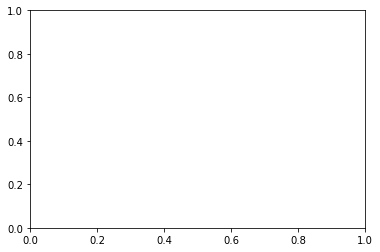

In [31]:
for T,gamma in zip(Periodos,Gamma):
    t,x,v=rk4_2d(f,a,b,N,Init_cond=[1,0])
    
    Tplot=[0] # Inicializar lista de tiempos donde t = n*Periodo
    A=[x[0]] #inicializar lista de Amplitudes máximas en todo el movimiento
    tempT=T
    # hallar los tiempos donde t es un múltiplo del período
    for i,j in zip(t,x):
        if abs(i-T)<= h/2:
            A.append(j)
            Tplot.append(i)
            tempT=tempT + T



    print("T ={}\n".format(Tplot))

    print("A is",A)

    Atau=np.array(A)*.37 # lista de amplitudes reducidas por .37

    print("\nA_tau is {}\n".format(Atau))


    # Hallar los tiempos tau en todo el movimiento 
    tau=0
    count=0
    Tauplot=[] # lista de tiempos donde se reduce la amplitud
    Tau=[] # lista del valor tau por cada ciclo (debe ser constante 1/gamma)
    delta=0

    for i,j in zip(x,t):
        if count==len(Atau) :
            break
        if (abs(i - Atau[count]) <= 1.4*h) and i>0  and abs(Tplot[count]-j)>=delta/2:
            print("A es {:.3E}".format(Atau[count]))
            print("i es {:.3E}".format(i))
            print("t es {}".format(j))
            
            delta=j-tau
            Tau.append(delta) 
            tau=j
            Tauplot.append(j)

            print("tau",delta)
            print("--"*10)
            count+=1
               
    print("---"*20)
#     plt.figure(dpi=180)
    print("gammas is {} and Tau is {}".format(gamma,Tau))
plt.plot(Gamma,Tau)
#     plt.plot(t,x)
#     plt.plot(Tplot,A,'b.-')
#     plt.plot(Tauplot,Atau,'r.--')
#     plt.grid()
#     plt.title(r"Amplitudes a tiempo $\tau$ para gamma = {}".format(gamma))
#     plt.legend(['x','amplitudes máximas',r'$\tau$ hallado'])
plt.show()


$\tau$ disminuye con $\gamma$ de manera que $\tau \propto \frac1\gamma$

![](Final_d.png)

La energía total es $E = T+U$ donde $ T = \frac12 mv^2$ y $ U= \frac12 kx^2$
Si la ecuación diferencial es de la forma $$ \ddot{x} + \gamma \dot x +\omega_0^2x =0  $$  $ \gamma$ y $\omega_0$ pueden ser reescritas como $$ \gamma = \frac bm \qquad \omega_0^2 = \frac km $$
Si tomamos que $m=1$ podemos calcular k necesaria para la energía potencial.
Esta sería 

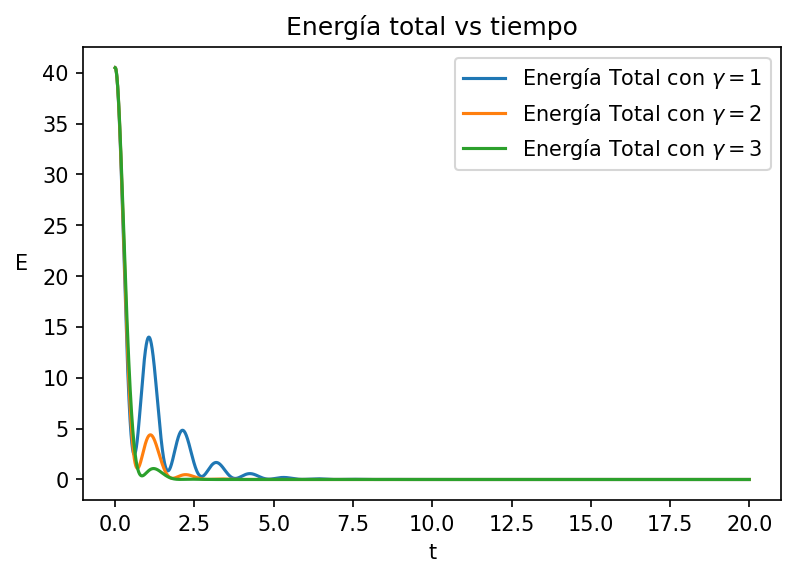

In [96]:
k= omega0**2
Gamma = [1,2,3]
# print("k =",k)
plt.figure(dpi=150)
for gamma in Gamma:
    t,x,v=rk4_2d(f,a,b,N,Init_cond=[1,0])
    Tcinetica=.5*(1*np.array(v,float)**2)
    Upotencial= .5*(k*np.array(x,float))**2
#     print("T={}\nU={}".format(Tcinetica,Upotencial))
    E = Tcinetica+Upotencial
#     print("E=",E)
    plt.plot(t,E,label="Energía Total con $\gamma = {}$".format(gamma));
plt.legend()
plt.ylabel('E',rotation=0,labelpad=10)
plt.title("Energía total vs tiempo")
plt.xlabel('t')
plt.show()

![](Final_e.png)

<ipython-input-104-3be8d498f6c4>:5: RuntimeWarning: invalid value encountered in sqrt
  Omega=(omega0**2-(Gamma/2)**2)**(.5)
<ipython-input-104-3be8d498f6c4>:6: RuntimeWarning: divide by zero encountered in true_divide
  Periodos= 2*np.pi/Omega


[4. 5. 6. 7. 8.]
[2.23606798 1.6583124  0.                nan        nan]
[2.80992589 3.7889033         inf        nan        nan]


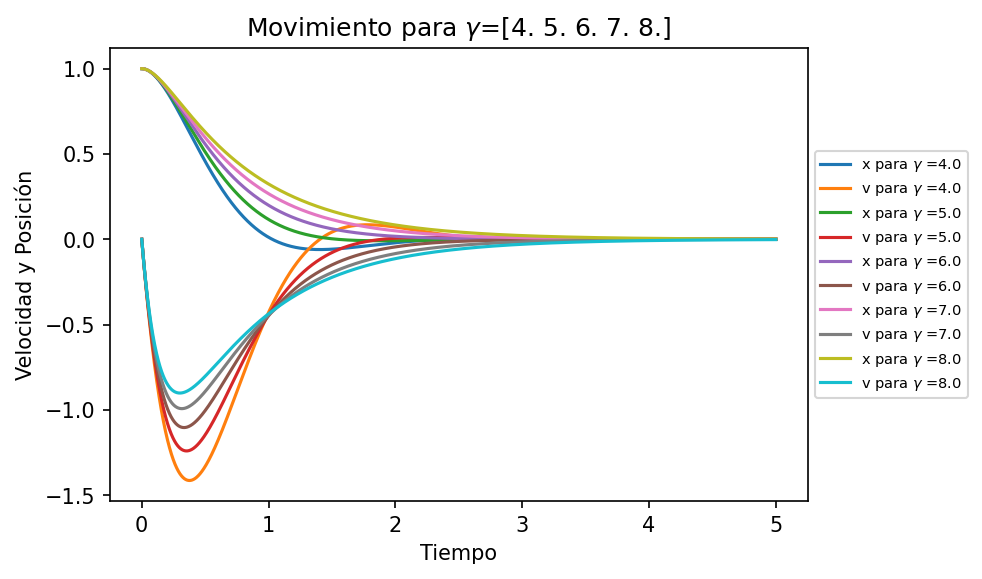

In [104]:
A0=x[0] #Amplitud inicial
omega0=3
Gamma = np.array([4,5,6,7,8],float)

Omega=(omega0**2-(Gamma/2)**2)**(.5) 
Periodos= 2*np.pi/Omega
print(Gamma)
print(Omega)
print(Periodos)
plt.figure(dpi=150)
for gamma in Gamma:
    
    t,x,v=rk4_2d(f,a,5,N,Init_cond=[1,0])
    plt.plot(t,x,label='x para $\gamma$ ={}'.format(gamma))
    plt.plot(t,v,label='v para $\gamma$ ={}'.format(gamma))
    plt.legend(bbox_to_anchor=(1.12,.5),loc=10,fontsize=7)
plt.title("Movimiento para $\gamma$={}".format(Gamma))
plt.ylabel('Velocidad y Posición')
plt.xlabel('Tiempo')
plt.show()

El movimiento deja de ser oscilatorio para esto valores de $\gamma$ ya que el sistema se encuentra sobre amortiguado. El decaimiento es exponencial.

![](Final_f.png)

<ipython-input-108-38b73071d998>:4: RuntimeWarning: invalid value encountered in sqrt
  Omega=(omega0**2-(Gamma/2)**2)**(.5)
<ipython-input-108-38b73071d998>:5: RuntimeWarning: divide by zero encountered in true_divide
  Periodos= 2*np.pi/Omega


[0.5 2.  4.  6.  8. ]
[2.98956519 2.82842712 2.23606798 0.                nan]
[2.1017054  2.22144147 2.80992589        inf        nan]


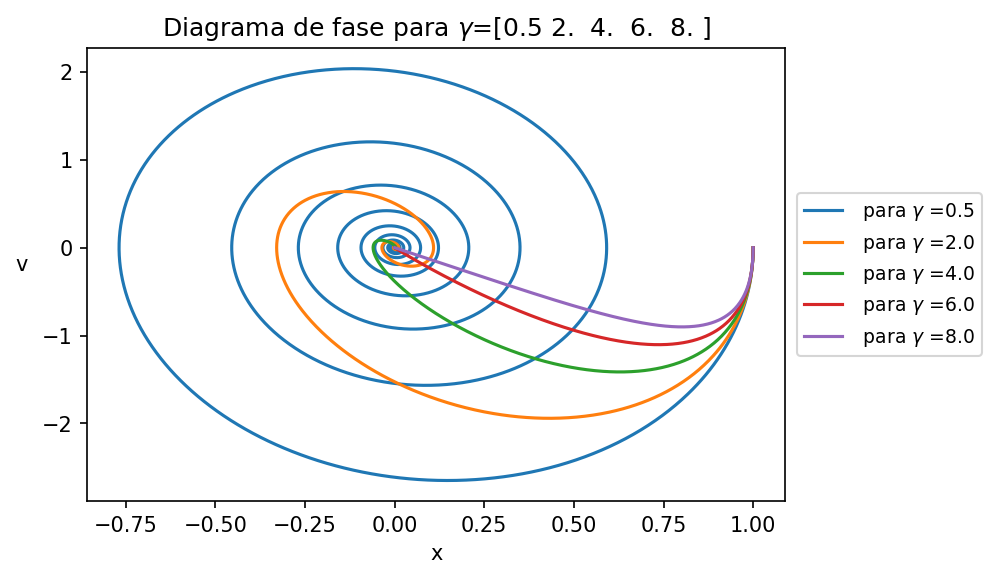

In [108]:
A0=x[0] #Amplitud inicial
omega0=3
Gamma = np.array([.5,2,4,6,8],float)
Omega=(omega0**2-(Gamma/2)**2)**(.5)
Periodos= 2*np.pi/Omega
print(Gamma)
print(Omega)
print(Periodos)
plt.figure(dpi=150)
for gamma in Gamma:
    
    t,x,v=rk4_2d(f,a,b,N,Init_cond=[1,0])
    plt.plot(x,v,label=' para $\gamma$ ={}'.format(gamma))
    plt.legend(ncol=1,bbox_to_anchor=(1.15,.5),loc=10,fontsize=9)
plt.title("Diagrama de fase para $\gamma$={}".format(Gamma))
plt.ylabel("v",rotation=0,labelpad=10)
plt.xlabel('x')
plt.show()

La trayectoria converge a $x=0$ y $v=0$ porque este es el estado al cual el sistema llega debido al amortiguamiento. Para toda $\gamma>0$ el diagrama de fase convergerá a este punto evenvtualmente.